In [36]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [50]:
# loading the file
data = pd.read_csv('air quality data.csv')
data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN


In [40]:
data.tail()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0
29530,Visakhapatnam,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0


In [42]:
#information of the datadset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  Xylene   11422 non-null  float64
 13  AQI      24850 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [44]:
print(data.shape)

(29531, 14)


In [16]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [18]:
data.isnull().sum()

City           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

In [20]:
data.isnull().sum().sum()

83807

In [56]:
data.duplicated().sum()

2297

In [64]:
#dro rows where the AQI column has missing values
data1 = data.dropna(subset = ['AQI'],inplace=True)

In [76]:
# sorting values in ascending
data.isnull().sum().sort_values(ascending=False)

Xylene     15372
PM10        7086
NH3         6536
Toluene     5826
Benzene     3535
NOx         1857
O3           807
PM2.5        678
SO2          605
CO           445
NO2          391
NO           387
City           0
AQI            0
dtype: int64

In [80]:
data.shape

(24850, 14)

In [88]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [94]:
null_values_percentage = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)

In [96]:
null_values_percentage

Xylene     61.859155
PM10       28.515091
NH3        26.301811
Toluene    23.444668
Benzene    14.225352
NOx         7.472837
O3          3.247485
PM2.5       2.728370
SO2         2.434608
CO          1.790744
NO2         1.573441
NO          1.557344
City        0.000000
AQI         0.000000
dtype: float64

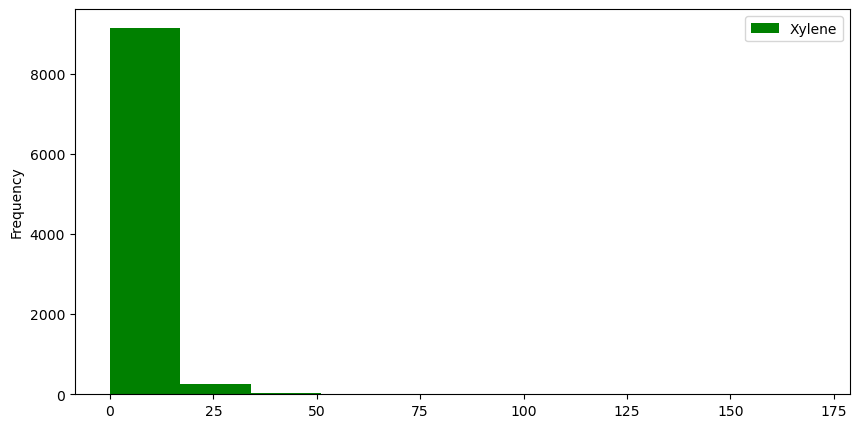

In [128]:
#Now we will start our Data Exploration using Vizualization EDA- Univariate anaylsis for each feature
#droping Xylene as it is having more that 50% missing values
data['Xylene'].plot(kind='hist',figsize=(10,5),color='green')
plt.legend()
plt.show()

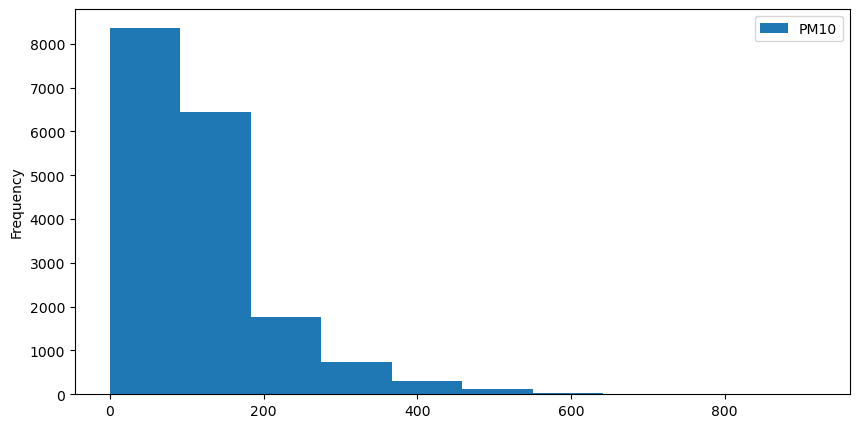

In [102]:
data['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

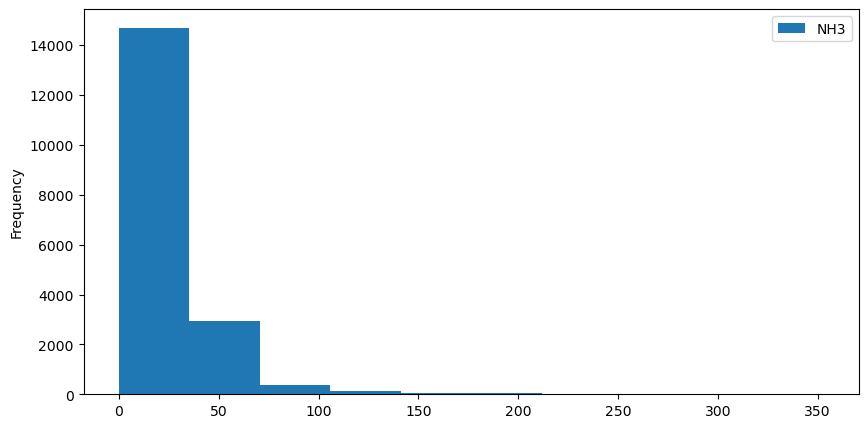

In [104]:
data['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

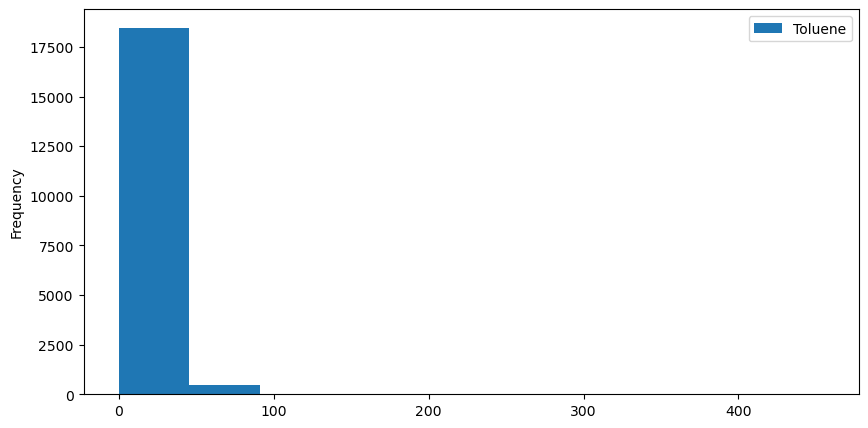

In [106]:
data['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

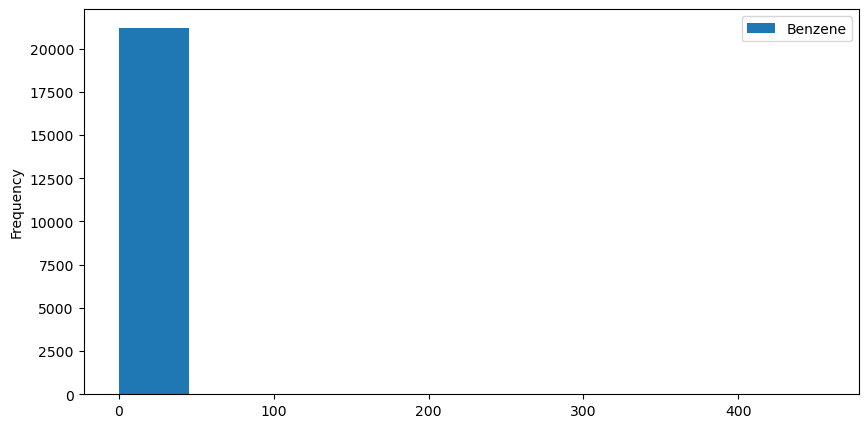

In [108]:
data['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

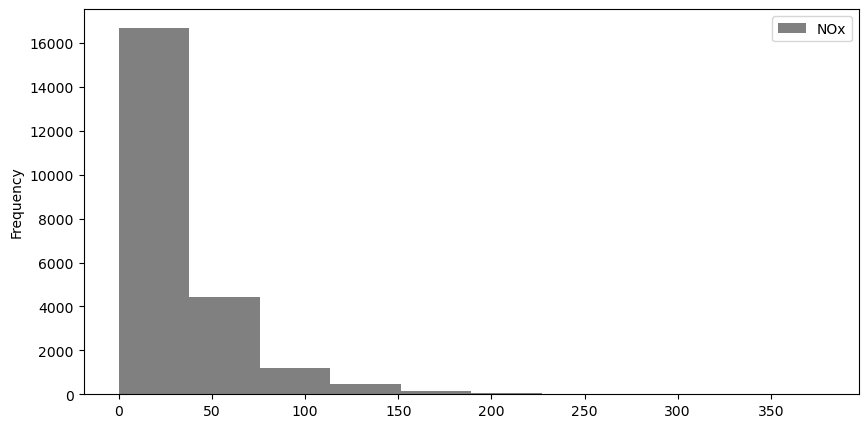

In [146]:
data['NOx'].plot(kind='hist',figsize=(10,5),color='grey')
plt.legend()
plt.show()

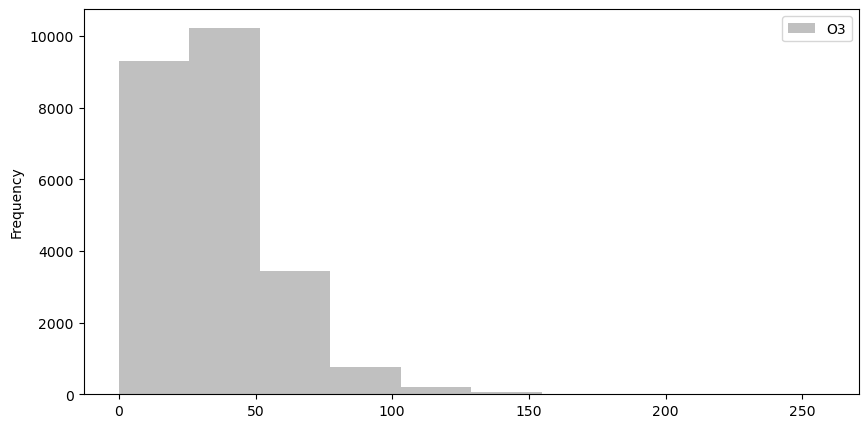

In [144]:
data['O3'].plot(kind='hist',figsize=(10,5),color='silver')
plt.legend()
plt.show()

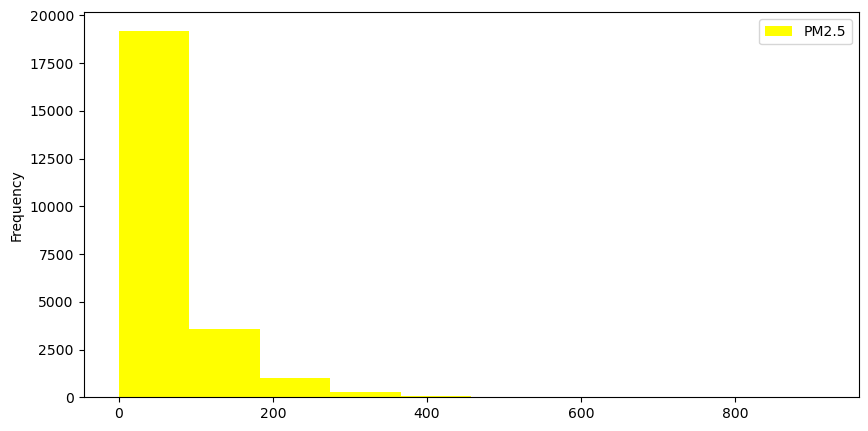

In [142]:
data['PM2.5'].plot(kind='hist',figsize=(10,5),color='yellow')
plt.legend()
plt.show()

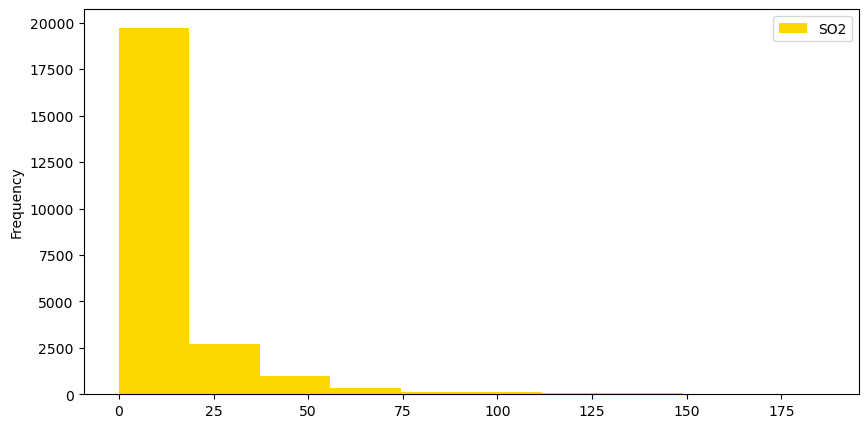

In [140]:
data['SO2'].plot(kind='hist',figsize=(10,5),color='gold')
plt.legend()
plt.show()

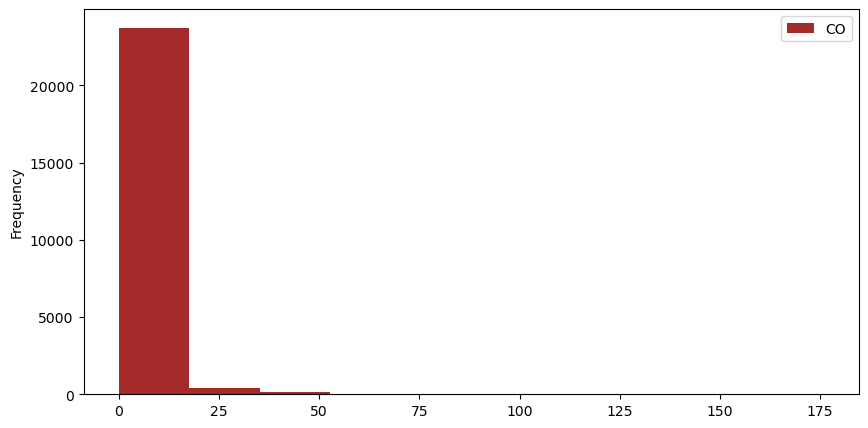

In [138]:
data['CO'].plot(kind='hist',figsize=(10,5),color='brown')
plt.legend()
plt.show()

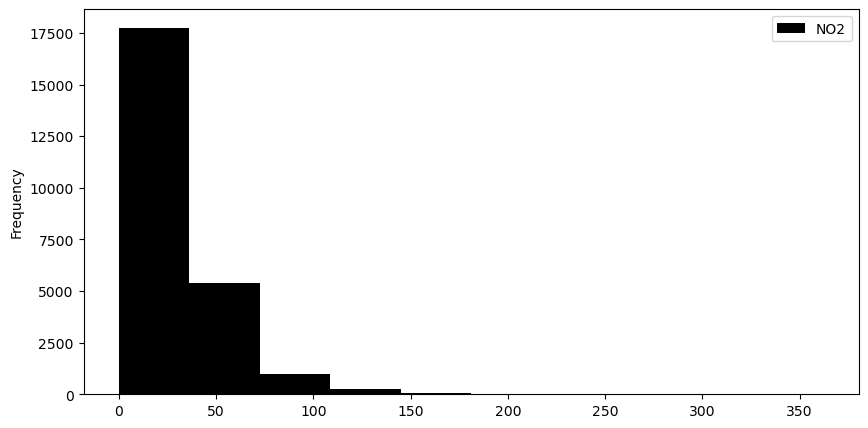

In [136]:
data['NO2'].plot(kind='hist',figsize=(10,5),color='black')
plt.legend()
plt.show()

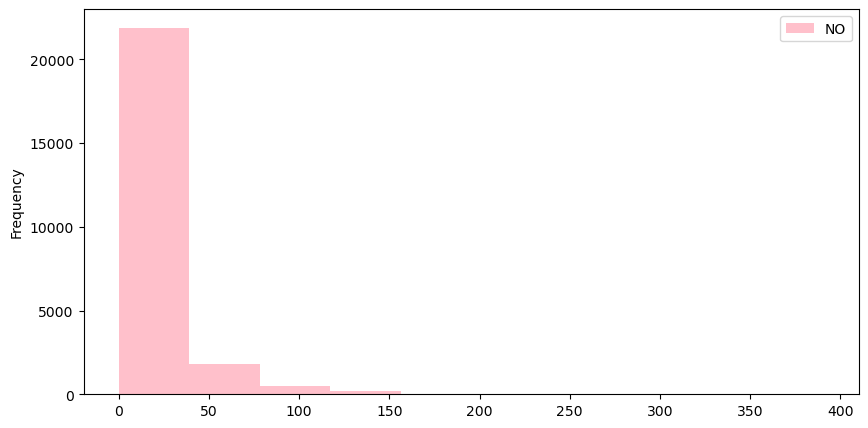

In [134]:
data['NO'].plot(kind='hist',figsize=(10,5),color='pink')
plt.legend()
plt.show()

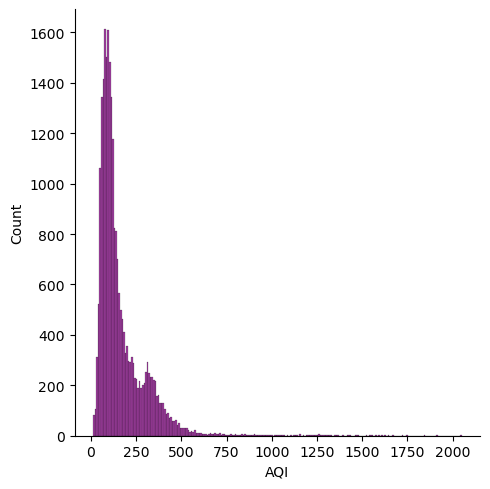

In [152]:
sns.displot(data,x="AQI", color="purple")
plt.show()

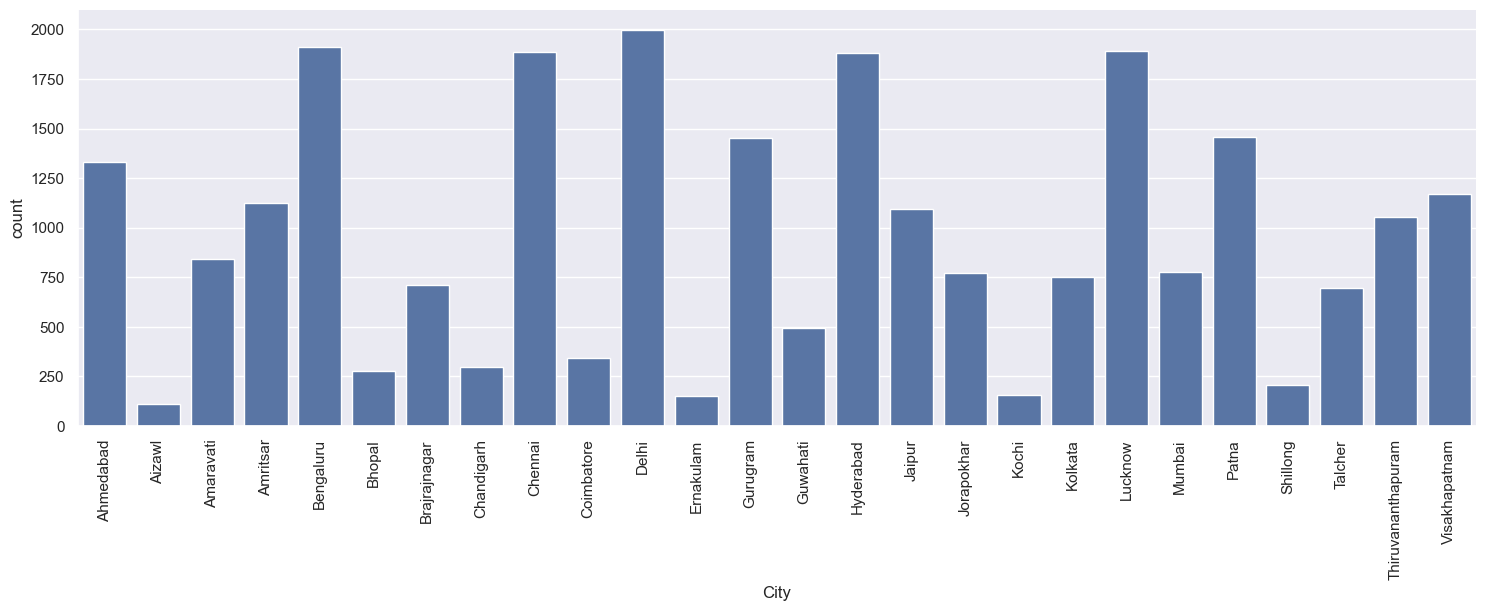

In [158]:
#bivarient anaylysis
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=data,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

In [168]:
data.describe().loc["std"]

PM2.5       63.075398
PM10        89.487976
NO          22.421138
NO2         24.627054
NOx         30.712855
NH3         25.875981
CO           7.075208
SO2         17.428693
O3          21.724525
Benzene     16.036020
Toluene     20.881085
Xylene       6.754324
AQI        140.696585
Name: std, dtype: float64

In [162]:
data.describe().loc["mean"]

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [209]:
data = data.replace({
    "PM2.5" : {np.nan:67.476613},
    "PM10" : {np.nan:118.454435},
    "NO" : {np.nan:17.622421},
    "NO2" : {np.nan:28.978391},
    "NOx" : {np.nan:32.289012},
    "NH3" : {np.nan:23.848366},
    "CO" : {np.nan:2.345267},
    "SO2" : {np.nan:14.362933},
    "O3" : {np.nan:34.912885},
    "Benzene" : {np.nan:3.458668},
    "Toluene" : {np.nan:9.525714},
    "Xylene" : {np.nan:3.588683},
})

In [207]:
data.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

<Axes: >

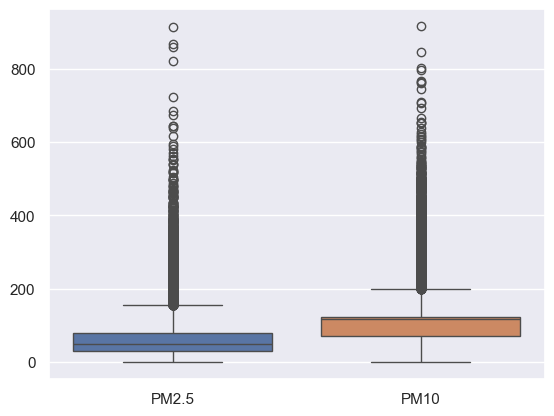

In [199]:
sns.boxplot(data=data[[ 'PM2.5', 'PM10']])

<Axes: >

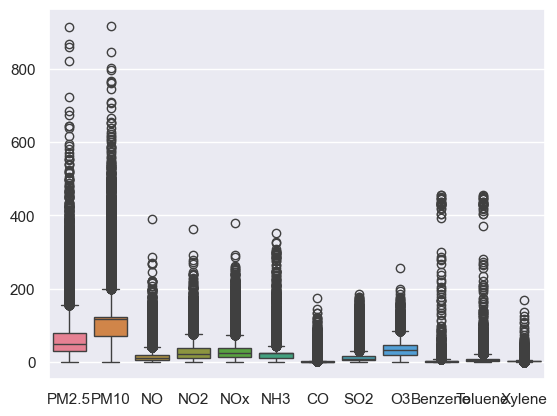

In [217]:
sns.boxplot(data=data[[ 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']])

In [213]:
data.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [229]:
#removing outliers as their are lots of oulyers so we are using inter quartile range
def replace_outliers_with_quartiles(data):
    for column in data.select_dtypes(include=['number']).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3-Q1

        lower_bond = Q1 - 1.5 * IQR
        upper_bond = Q3 + 1.5 * IQR

        data[column] = data[column].apply(
        lambda x:Q1 if x < lower_bond else (Q3 if x > upper_bond else x)
        )
    return data
data = replace_outliers_with_quartiles(data)

<Axes: >

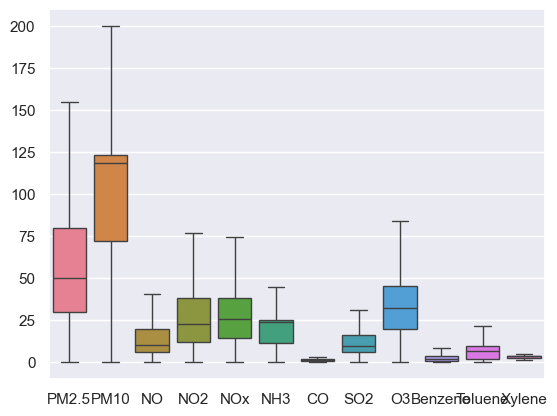

In [231]:
sns.boxplot(data=data[[ 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']])